In [1]:
import pandas as pd

In [149]:
RPSALE = pd.read_csv('data/EXTR_RPSale.csv', low_memory=False)
RPSALE["SalePrice"].max()

711013000

In [3]:
RPSALE.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2642952,720319,0520,11/20/2013,699950,20131126001594,,,,,...,2,6,3,N,N,N,N,1,8,
1,1381073,154580,1220,06/16/1994,125000,199406211626,089,011,154580,P,...,3,6,2,N,N,N,N,1,8,
2,2496482,356730,0045,06/09/2011,542200,20110617001045,,,,,...,3,6,3,,,,,1,8,
3,1970507,252505,9206,06/25/2003,443000,20030702002332,,,,,...,3,6,3,N,N,N,N,1,8,
4,1701215,235930,0072,07/08/1999,225000,19990730000822,,,,,...,3,6,3,N,N,N,N,1,8,


In [4]:
RPSALE['MergeID'] = RPSALE['Major']+RPSALE['Minor']

In [5]:
len(RPSALE)

1928494

In [6]:
RPSALE_TEST = RPSALE.drop_duplicates(subset='MergeID')

In [7]:
len(RPSALE_TEST)

662074

In [8]:
COMBUILD = pd.read_csv('data/EXTR_CommBldg.csv', low_memory=False)

In [9]:
COMBUILD.head()

,Major,Minor,BldgNbr,NbrBldgs,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,BldgQuality,BldgDescr,BldgGrossSqFt,BldgNetSqFt,YrBuilt,EffYr,PcntComplete,HeatingSystem,Sprinklers,Elevators
0,192105,9114,1,1,1407 AUBURN WAY S ...,1407,,,AUBURN,WAY,...,4,RETAIL ...,21296,21296,1967,1980,100,6,N,
1,212206,9057,3,1,24409 WITTE RD SE...,24409,,,WITTE,RD,...,4,Duplex ...,1248,1248,1960,1990,100,1,,
2,384610,10,1,2,927 N 100TH ST ...,927,,N,100TH,ST,...,4,SEATTLE HOUSING AUTH ...,7892,7892,1986,1991,100,2,N,N
3,881640,755,1,1,5229 UNIVERSITY WAY NE...,5229,,,UNIVERSITY,WAY,...,4,OFFICE & APTS ...,2274,2274,1963,1974,100,1,N,
4,30351,60,1,1,1519 WEST VALLEY HWY N ...,1519,,,WEST VALLEY,HWY,...,4,OFFICE BLDG ...,20428,16288,1993,1999,100,11,Y,


In [10]:
COMBUILD['MergeID'] = COMBUILD['Major'].map(str)+COMBUILD['Minor'].map(str)

In [11]:
COMBUILD['Comm_or_Res'] = 'Comm'

In [12]:
COMBUILD = COMBUILD.drop_duplicates(subset='MergeID',keep='first')

In [13]:
first_merge = pd.merge(RPSALE, COMBUILD, how='left', on='MergeID')

In [14]:
print len(RPSALE), len(first_merge)

1928494 1928494


In [15]:
RESBUILD = pd.read_csv('data/EXTR_ResBldg.csv', low_memory=False)

In [16]:
RESBUILD['MergeID'] = RESBUILD['Major'].map(str)+RESBUILD['Minor'].map(str)
RESBUILD['Comm_or_Res'] = 'Res'
RESBUILD = RESBUILD.drop_duplicates(subset='MergeID',keep='first')
RESBUILD.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,MergeID,Comm_or_Res
0,40,1,1,1,26910 86TH AVE S 98030,26910,,,86TH,AVE,...,0,1915,0,0,0,0,3,0,401,Res
1,100,45,1,1,922 22ND ST NE 98002,922,,,22ND,ST,...,0,1952,0,0,0,0,4,0,10045,Res
2,100,90,1,2,923 28TH ST NE 98002,923,,,28TH,ST,...,0,1977,0,0,0,0,4,0,10090,Res
3,100,95,1,1,911 14TH ST NE 98002,911,,,14TH,ST,...,0,1914,0,0,0,0,4,0,10095,Res
4,120,7,1,1,17760 MARINE VIEW DR SW 98166,17760,,,MARINE VIEW,DR,...,0,1942,0,0,0,0,4,0,1207,Res


In [17]:
len(RESBUILD)

501840

In [18]:
comm_and_res = pd.merge(RESBUILD, COMBUILD, how='inner', on='MergeID')

In [20]:
comm_and_res.head()

,Major_x,Minor_x,BldgNbr_x,NbrLivingUnits,Address_x,BuildingNumber_x,Fraction_x,DirectionPrefix_x,StreetName_x,StreetType_x,...,BldgDescr,BldgGrossSqFt,BldgNetSqFt,YrBuilt_y,EffYr,PcntComplete_y,HeatingSystem,Sprinklers,Elevators,Comm_or_Res_y
0,300,100,1,1,13535 53RD AVE S 98168,13535,,,53RD,AVE,...,2 COMMERCIAL SPACES OFFICE/RETAIL ...,2389,2389,2002,2002,100,3,,,Comm
1,4100,200,1,1,14829 42ND AVE S 98168,14829,,,42ND,AVE,...,Lake Vista ...,4653,4653,1980,1988,100,2,,,Comm
2,6600,280,1,1,6031 38TH AVE SW 98126,6031,,,38TH,AVE,...,21 RESIDENTIAL UNITS 2 COML UNIT ...,4867,4867,1997,1997,100,0,,Y,Comm
3,952810,1240,1,5,,,,NaN,,,...,5 Unit Apartment ...,6172,5536,1998,1998,100,2,,,Comm
4,6600,470,1,1,6016 38TH AVE SW 98126,6016,,,38TH,AVE,...,PACIFIC PLACE SHOPPING MALL & PKG GAR. ...,779969,339784,1999,2000,100,17,Y,Y,Comm


In [19]:
len(comm_and_res)

9

In [20]:
comm_and_res_ids = comm_and_res['MergeID'].tolist()

In [21]:
sale_comm_res = pd.merge(first_merge, RESBUILD, how='left', on='MergeID')

In [22]:
sale_comm_res.head()

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpFreestanding,FpAdditional,YrBuilt_y,YrRenovated,PcntComplete_y,Obsolescence,PcntNetCondition,Condition,AddnlCost,Comm_or_Res_y
0,2642952,720319,0520,11/20/2013,699950,20131126001594,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1381073,154580,1220,06/16/1994,125000,199406211626,089,011,154580,P,...,0.0,0.0,1985.0,0.0,0.0,0.0,0.0,3.0,0.0,Res
2,2496482,356730,0045,06/09/2011,542200,20110617001045,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1970507,252505,9206,06/25/2003,443000,20030702002332,,,,,...,0.0,0.0,2001.0,0.0,0.0,0.0,0.0,3.0,0.0,Res
4,1701215,235930,0072,07/08/1999,225000,19990730000822,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print len(RPSALE), len(first_merge), len(sale_comm_res)

1928494 1928494 1928494


In [24]:
sale_comm_res[sale_comm_res['MergeID'].isin(comm_and_res_ids)]

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpFreestanding,FpAdditional,YrBuilt_y,YrRenovated,PcntComplete_y,Obsolescence,PcntNetCondition,Condition,AddnlCost,Comm_or_Res_y
103921,2858041,952810,1240,04/07/2017,20000,20170411000680,,,,,...,0.0,0.0,1996.0,0.0,0.0,0.0,0.0,3.0,0.0,Res
784415,2206600,952810,1240,05/11/2006,0,20060515000683,,,,,...,0.0,0.0,1996.0,0.0,0.0,0.0,0.0,3.0,0.0,Res


In [25]:
sale_comm_res[sale_comm_res['SalePrice'] == 0].head()

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,FpFreestanding,FpAdditional,YrBuilt_y,YrRenovated,PcntComplete_y,Obsolescence,PcntNetCondition,Condition,AddnlCost,Comm_or_Res_y
8,1307121,440070,0200,05/05/1993,0,199305112239,062,076,440070,P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2826129,445872,0260,10/03/2016,0,20161004000511,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,2860712,408330,4150,03/15/2017,0,20170426000922,,,,,...,0.0,0.0,1906.0,0.0,0.0,0.0,0.0,4.0,0.0,Res
21,2644191,312107,9036,12/05/2013,0,20131206000531,,,,,...,0.0,0.0,1994.0,0.0,0.0,0.0,0.0,3.0,0.0,Res
24,1729614,172204,9157,12/21/1999,0,19991229001498,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
list(sale_comm_res)

['ExciseTaxNbr',
 'Major_x',
 'Minor_x',
 'DocumentDate',
 'SalePrice',
 'RecordingNbr',
 'Volume',
 'Page',
 'PlatNbr',
 'PlatType',
 'PlatLot',
 'PlatBlock',
 'SellerName',
 'BuyerName',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning',
 'MergeID',
 'Major_y',
 'Minor_y',
 'BldgNbr_x',
 'NbrBldgs',
 'Address_x',
 'BuildingNumber_x',
 'Fraction_x',
 'DirectionPrefix_x',
 'StreetName_x',
 'StreetType_x',
 'DirectionSuffix_x',
 'ZipCode_x',
 'NbrStories',
 'PredominantUse',
 'Shape',
 'ConstrClass',
 'BldgQuality',
 'BldgDescr',
 'BldgGrossSqFt',
 'BldgNetSqFt',
 'YrBuilt_x',
 'EffYr',
 'PcntComplete_x',
 'HeatingSystem',
 'Sprinklers',
 'Elevators',
 'Comm_or_Res_x',
 'Major',
 'Minor',
 'BldgNbr_y',
 'NbrLivingUnits',
 'Address_y',
 'BuildingNumber_y',
 'Fraction_y',
 'DirectionPrefix_y',
 'StreetName_y',
 'StreetType_y',
 'DirectionSuffix_y',
 'ZipCode_y

In [27]:
sale_comm_res['Comm_or_Res'] = sale_comm_res['Comm_or_Res_x'] + sale_comm_res['Comm_or_Res_y']

In [28]:
print len(sale_comm_res), len(RESBUILD), len(COMBUILD)

1928494 501840 32481


In [39]:
sale_comm_res[['MergeID','Comm_or_Res','Comm_or_Res_x','Comm_or_Res_y']]

,MergeID,Comm_or_Res,Comm_or_Res_x,Comm_or_Res_y
0,7203190520,NaN,NaN,NaN
1,1545801220,NaN,NaN,Res
2,3567300045,NaN,NaN,NaN
3,2525059206,NaN,NaN,Res
4,2359300072,NaN,NaN,NaN
5,8946770240,NaN,NaN,NaN
6,9825700015,NaN,NaN,NaN
7,2470200060,NaN,NaN,NaN
8,4400700200,NaN,NaN,NaN
9,6441800110,NaN,NaN,NaN


In [74]:
sale_res = sale_comm_res[sale_comm_res["Comm_or_Res_y"]=='Res']
sale_res = sale_res[sale_res["SalePrice"] > 1000]

In [75]:
len(sale_res)

186285

In [80]:
import numpy as np
import matplotlib

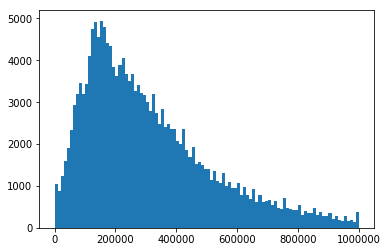

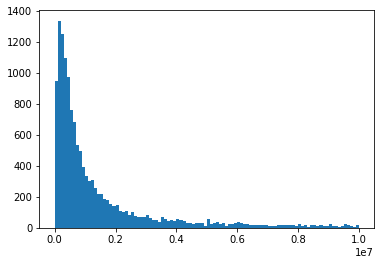

In [124]:
sale_com = sale_comm_res[sale_comm_res["Comm_or_Res_x"]=='Comm']
sale_com = sale_com[sale_com["SalePrice"] >10000]
matplotlib.pyplot.hist(sale_res["SalePrice"], bins = 100, range = (0, 1000000))
matplotlib.pyplot.show()
matplotlib.pyplot.hist(sale_com["SalePrice"], bins = 100, range = (0, 10000000))
matplotlib.pyplot.show()

In [125]:
sale_com['DocumentDate'] = pd.to_datetime(sale_com['DocumentDate'])
sale_res['DocumentDate'] = pd.to_datetime(sale_res['DocumentDate'])

In [155]:
sale_com['year'] = sale_com['DocumentDate'].dt.year
sale_res['year'] = sale_res['DocumentDate'].dt.year
sale_com = sale_com[sale_com['year'] >= 1982]
sale_res = sale_res[sale_res['year'] >= 1982]

In [156]:
sale_com.head()

,ExciseTaxNbr,Major_x,Minor_x,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,YrBuilt_y,YrRenovated,PcntComplete_y,Obsolescence,PcntNetCondition,Condition,AddnlCost,Comm_or_Res_y,Comm_or_Res,year
89,1625698,252611,9029,1998-07-13,20000,199807161059,000,000,000000,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998
95,1415794,312604,9025,1995-02-06,260000,199502100116,000,000,000000,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1995
324,2892617,952810,4530,2017-09-15,2019200,20170929001867,,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017
684,1350727,122505,9187,1993-11-30,300000,199312292467,000,000,000000,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1993
742,777030,239710,1505,1984-05-25,175000,198406040077,004,036,239710,P,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1984


In [51]:
from collections import defaultdict

In [52]:
year_avg = defaultdict(list)

In [157]:
com_sale_by_year = sale_com.groupby(["year"])["SalePrice"].median()
res_sale_by_year = sale_res.groupby(["year"])["SalePrice"].median()

In [158]:
com_sale_by_year

year
1982     191666
1983     248240
1984     246000
1985     189000
1986     230000
1987     228470
1988     220000
1989     315000
1990     327500
1991     411967
1992     329500
1993     419990
1994     386000
1995     350000
1996     500000
1997     610000
1998     550000
1999     665000
2000     689975
2001     700000
2002     791512
2003     660000
2004     868750
2005    1000000
2006    1136000
2007    1625000
2008    1397041
2009     976000
2010     875000
2011     905000
2012    1243875
2013    1361100
2014    1400000
2015    1797400
2016    1855000
2017    1910000
Name: SalePrice, dtype: int64

In [135]:
import matplotlib.pyplot as plt
%matplotlib 

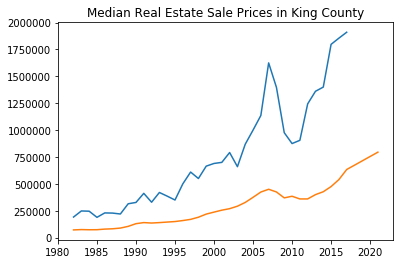

In [162]:
plt.plot(com_sale_by_year)
plt.plot(res_sale_by_year)
plt.title("Median Real Estate Sale Prices in King County")